# The analysis of the Unemployment Rate of Five American States and their Counties

#### The purpose of this project is to analyze the unemployment rate of 5 random United State of American States and their Counties. This analysis will be from 2014 to 2016 along all the months of the years. This analysis will show States and Counties that have considerably high or low unemployment rates over those years.

#### Unemployment is a key component in a state economics because it can put pressure on the Government budget, benefits  and infrastructure when it is very high. It may also lead to an increase in crimes so it is always better for a state when the unemployment rate is low. When unemployment rate is low, the citizens will spend more, pay more tax, which in turn gives Government more money to build more infrastructure, invest in the state and pay salaries.

#### The dataset I will be using for the analysis will be scraped from Kaggle website. I will be dividing up the table and merging some data to create a new table that will be used for my entire analysis. 

#### The tools I will be using for the analysis Pandas, Opendatasets, Numpy, Matplotlib and Seaborne. They will help analyse the tabular data, compute and aggregate numerical data, plot graphs etc. I learned how to use all these from the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and I hope to showcase all I have learned to communicate my insights from the analysis.


## Downloading the Dataset

**TODO** - I will be downloading the initial datasets from Kaggle website using opendatasets. I will begin by installing and importing opendatasets before downloading the data. 

In [1]:
!pip install opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.


In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/jayrav13/unemployment-by-county-us' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olubukolabadero
Your Kaggle Key: ········


100%|███████████████████████████████████████| 12.3M/12.3M [00:25<00:00, 512kB/s]


In [4]:
data_dir = './unemployment-by-county-us'

In [5]:
import os
os.listdir(data_dir)

['result.json', 'output.csv']

## Data Preparation and Cleaning

**TODO** - As earlier explained we will only be analyzing the unemployment rate of 5 states for 3 years. To do this, we will import pandas, load the downloaded data. The relevant years will be extracted and then divided up for merging across the States.


**Now we will import Pandas to enable us read the downloaded the data for analysis. Pandas is a python library used for analyzing and working on tabular data.**

In [6]:
import pandas as pd

In [8]:
unemployment = pd.read_csv('output.csv')

unemployment

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3


**Now let us assess some basic information about the downloaded data**

In [9]:
null_values = unemployment.isna().sum().sum()

print('There are {} null values in the datasets.'.format(null_values))

There are 0 null values in the datasets.


In [10]:
unemployment.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


In [11]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [12]:
unemployment.shape
print('There are {} rows of data with {} columns.'.format(unemployment.shape[0],unemployment.shape[1]))

There are 885548 rows of data with 5 columns.


In [13]:
unemployment.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

In [14]:
unemployment.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

In [15]:
Number_of_duplicates = unemployment.duplicated().sum().sum()

print('There are {} duplicates in the datasets.'.format(Number_of_duplicates))

There are 0 duplicates in the datasets.


In [16]:
unemployment.State.unique()

array(['Mississippi', 'Oklahoma', 'Delaware', 'Minnesota', 'Illinois',
       'Arkansas', 'New Mexico', 'Indiana', 'Maryland', 'Louisiana',
       'Idaho', 'Wyoming', 'Tennessee', 'Arizona', 'Iowa', 'Kansas',
       'Utah', 'Virginia', 'Oregon', 'Connecticut', 'Montana',
       'California', 'Massachusetts', 'West Virginia', 'South Carolina',
       'New Hampshire', 'Wisconsin', 'Vermont', 'North Dakota',
       'Pennsylvania', 'Kentucky', 'Hawaii', 'Nebraska', 'Missouri',
       'Ohio', 'Alabama', 'Rhode Island', 'South Dakota', 'Colorado',
       'New Jersey', 'Washington', 'North Carolina', 'New York', 'Texas',
       'Nevada', 'Maine', 'Michigan'], dtype=object)

In [17]:
len(unemployment.State.unique())

print('We will be analysing the unemployment rate of each county in five (5) States in {} American states over a period of three (3) years. It is worthy of note that there are 50 states in America so the following State data are absent in the data sets: Alaska, Miami and Georgia.'.format(len(unemployment.State.unique())))

We will be analysing the unemployment rate of each county in five (5) States in 47 American states over a period of three (3) years. It is worthy of note that there are 50 states in America so the following State data are absent in the data sets: Alaska, Miami and Georgia.


In [18]:
unemployment.Year.unique()

print('The data covers {} years. However, we will only analyse three (3) years data.'. format(len(unemployment.Year.unique())))

The data covers 27 years. However, we will only analyse three (3) years data.


**The purpose of this Data analysis will be to analyze the unemployment rate rate of 5 states in America. Thus we will begin by selecting the relevant dates that will be used for the analysis prior to selecting the relevant American States that their data will be analyzed.**

In [19]:
new_data = unemployment.loc[unemployment['Year'] > 2013]

new_data

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...
102225,2016,November,Maine,Somerset County,5.4
102226,2016,November,Maine,Oxford County,4.6
102227,2016,November,Maine,Knox County,3.6
102228,2016,November,Maine,Piscataquis County,5.6


In [20]:
new_data.Year.unique()

print('We will only be analysing {} years of unemployment rate data'.format(len(new_data.Year.unique())))

We will only be analysing 3 years of unemployment rate data


In [21]:
new_data.Month.unique()

print('We will be analysing {} months of unemployment rate data in every year'.format(len(new_data.Month.unique())))

We will be analysing 12 months of unemployment rate data in every year


**Now that the relevant years have been selected from the data. We will now go ahead to select the respective states that will be analyzed in this project. 
This will be done by retrieving and then merging data of various states across the three relevant years in other to create five independent tables for the different states. 
New columns will be created, amended and dropped to create a clean usable for the analysis process.** 

## The following states data will be analyzed:
* Alabama 
* Massachusetts
* Maryland
* New York
* Washington

## Alabama 

In [22]:
Alabama = new_data.loc[(new_data['Year'] >= 2014) & (new_data['State'] == 'Alabama')]
Alabama

,Year,Month,State,County,Rate
2091,2015,February,Alabama,Autauga County,5.3
2092,2015,February,Alabama,Conecuh County,9.4
2093,2015,February,Alabama,Monroe County,10.0
2094,2015,February,Alabama,Colbert County,8.4
2095,2015,February,Alabama,Calhoun County,7.0
...,...,...,...,...,...
101581,2016,November,Alabama,Baldwin County,5.2
101582,2016,November,Alabama,Tuscaloosa County,5.2
101583,2016,November,Alabama,Walker County,6.8
101584,2016,November,Alabama,Talladega County,6.7


In [23]:
alabama_2014 = new_data.loc[(new_data['Year'] == 2014) & (new_data['State'] == 'Alabama')]
alabama_2015 = new_data.loc[(new_data['Year'] == 2015) & (new_data['State'] == 'Alabama')]
alabama_2016 = new_data.loc[(new_data['Year'] == 2016) & (new_data['State'] == 'Alabama')]

In [24]:
alabama_2014 = new_data.loc[(new_data['Year'] == 2014) & (new_data['State'] == 'Alabama')]
alabama_2015 = new_data.loc[(new_data['Year'] == 2015) & (new_data['State'] == 'Alabama')]
alabama_2016 = new_data.loc[(new_data['Year'] == 2016) & (new_data['State'] == 'Alabama')]

In [25]:
merge = alabama_2014.merge(alabama_2015, on = ['Month', 'State', 'County'])
Alabama_merge = merge.merge(alabama_2016, on = ['Month', 'State', 'County'])

Alabama_merge

,Year_x,Month,State,County,Rate_x,Year_y,Rate_y,Year,Rate
0,2014,February,Alabama,Autauga County,6.8,2015,5.3,2016,5.6
1,2014,February,Alabama,Conecuh County,12.6,2015,9.4,2016,9.7
2,2014,February,Alabama,Monroe County,12.7,2015,10.0,2016,10.6
3,2014,February,Alabama,Colbert County,8.8,2015,8.4,2016,7.8
4,2014,February,Alabama,Calhoun County,9.2,2015,7.0,2016,7.2
...,...,...,...,...,...,...,...,...,...
799,2014,November,Alabama,Baldwin County,5.3,2015,5.3,2016,5.2
800,2014,November,Alabama,Tuscaloosa County,4.8,2015,5.1,2016,5.2
801,2014,November,Alabama,Walker County,6.7,2015,7.2,2016,6.8
802,2014,November,Alabama,Talladega County,6.4,2015,6.2,2016,6.7


In [26]:
Alabama_merge.rename(columns = {'Rate_x':'Rate_2014', 'Rate_y':'Rate_2015', 'Rate':'Rate_2016'}, inplace = True)
Alabama_merge.drop(columns = {'Year_x', 'Year_y', 'Year'}, inplace = True)

Alabama_merge

,Month,State,County,Rate_2014,Rate_2015,Rate_2016
0,February,Alabama,Autauga County,6.8,5.3,5.6
1,February,Alabama,Conecuh County,12.6,9.4,9.7
2,February,Alabama,Monroe County,12.7,10.0,10.6
3,February,Alabama,Colbert County,8.8,8.4,7.8
4,February,Alabama,Calhoun County,9.2,7.0,7.2
...,...,...,...,...,...,...
799,November,Alabama,Baldwin County,5.3,5.3,5.2
800,November,Alabama,Tuscaloosa County,4.8,5.1,5.2
801,November,Alabama,Walker County,6.7,7.2,6.8
802,November,Alabama,Talladega County,6.4,6.2,6.7


**Now that we have a working data frame for Alabama, we will repeat the same process to create a data frame for the other states before we begin analysis on all the data.**

## Maryland

In [27]:
Maryland = new_data.loc[(new_data['Year'] >= 2014) & (new_data['State'] == 'Maryland')]
Maryland

,Year,Month,State,County,Rate
551,2015,February,Maryland,Cecil County,6.9
552,2015,February,Maryland,Anne Arundel County,4.8
553,2015,February,Maryland,Calvert County,4.8
554,2015,February,Maryland,Prince George's County,5.6
555,2015,February,Maryland,Talbot County,6.2
...,...,...,...,...,...
99979,2016,November,Maryland,Howard County,3.0
99980,2016,November,Maryland,Harford County,3.7
99981,2016,November,Maryland,Kent County,4.4
99982,2016,November,Maryland,Caroline County,4.6


In [28]:
maryland_2014 = new_data.loc[(new_data['Year'] == 2014) & (new_data['State'] == 'Maryland')]
maryland_2015 = new_data.loc[(new_data['Year'] == 2015) & (new_data['State'] == 'Maryland')]
maryland_2016 = new_data.loc[(new_data['Year'] == 2016) & (new_data['State'] == 'Maryland')]

In [29]:
ma_merge = maryland_2014.merge(maryland_2015, on = ['Month', 'State', 'County'])
Maryland_merge = ma_merge.merge(maryland_2016, on = ['Month', 'State', 'County'])

Maryland_merge

,Year_x,Month,State,County,Rate_x,Year_y,Rate_y,Year,Rate
0,2014,February,Maryland,Cecil County,7.6,2015,6.9,2016,5.9
1,2014,February,Maryland,Anne Arundel County,5.4,2015,4.8,2016,4.1
2,2014,February,Maryland,Calvert County,5.6,2015,4.8,2016,4.2
3,2014,February,Maryland,Prince George's County,6.5,2015,5.6,2016,4.8
4,2014,February,Maryland,Talbot County,6.5,2015,6.2,2016,5.4
...,...,...,...,...,...,...,...,...,...
283,2014,November,Maryland,Howard County,4.0,2015,3.6,2016,3.0
284,2014,November,Maryland,Harford County,5.1,2015,4.5,2016,3.7
285,2014,November,Maryland,Kent County,5.7,2015,5.1,2016,4.4
286,2014,November,Maryland,Caroline County,5.8,2015,5.3,2016,4.6


In [30]:
Maryland_merge.rename(columns = {'Rate_x':'Rate_2014', 'Rate_y':'Rate_2015', 'Rate':'Rate_2016'}, inplace = True)
Maryland_merge.drop(columns = {'Year_x', 'Year_y', 'Year'}, inplace = True)

Maryland_merge

,Month,State,County,Rate_2014,Rate_2015,Rate_2016
0,February,Maryland,Cecil County,7.6,6.9,5.9
1,February,Maryland,Anne Arundel County,5.4,4.8,4.1
2,February,Maryland,Calvert County,5.6,4.8,4.2
3,February,Maryland,Prince George's County,6.5,5.6,4.8
4,February,Maryland,Talbot County,6.5,6.2,5.4
...,...,...,...,...,...,...
283,November,Maryland,Howard County,4.0,3.6,3.0
284,November,Maryland,Harford County,5.1,4.5,3.7
285,November,Maryland,Kent County,5.7,5.1,4.4
286,November,Maryland,Caroline County,5.8,5.3,4.6


# Washington 

In [31]:
Washington = new_data.loc[(new_data['Year'] >= 2014) & (new_data['State'] == 'Washington')]
Washington

,Year,Month,State,County,Rate
2314,2015,February,Washington,Asotin County,5.6
2315,2015,February,Washington,Mason County,8.7
2316,2015,February,Washington,Klickitat County,9.1
2317,2015,February,Washington,Jefferson County,8.3
2318,2015,February,Washington,Chelan County,7.3
...,...,...,...,...,...
101776,2016,November,Washington,Pacific County,8.3
101777,2016,November,Washington,Clallam County,7.4
101778,2016,November,Washington,Kitsap County,5.5
101779,2016,November,Washington,Stevens County,7.6


In [32]:
washington_2014 = new_data.loc[(new_data['Year'] == 2014) & (new_data['State'] == 'Washington')]
washington_2015 = new_data.loc[(new_data['Year'] == 2015) & (new_data['State'] == 'Washington')]
washington_2016 = new_data.loc[(new_data['Year'] == 2016) & (new_data['State'] == 'Washington')]

In [33]:
w_merge = washington_2014.merge(washington_2015, on = ['Month', 'State', 'County'])
Washington_merge = w_merge.merge(washington_2016, on = ['Month', 'State', 'County'])

Washington_merge

,Year_x,Month,State,County,Rate_x,Year_y,Rate_y,Year,Rate
0,2014,February,Washington,Asotin County,6.8,2015,5.6,2016,6.2
1,2014,February,Washington,Mason County,9.8,2015,8.7,2016,8.5
2,2014,February,Washington,Klickitat County,10.2,2015,9.1,2016,8.6
3,2014,February,Washington,Jefferson County,9.2,2015,8.3,2016,7.8
4,2014,February,Washington,Chelan County,8.4,2015,7.3,2016,7.9
...,...,...,...,...,...,...,...,...,...
463,2014,November,Washington,Pacific County,9.8,2015,9.1,2016,8.3
464,2014,November,Washington,Clallam County,8.4,2015,7.7,2016,7.4
465,2014,November,Washington,Kitsap County,5.8,2015,5.0,2016,5.5
466,2014,November,Washington,Stevens County,8.6,2015,7.8,2016,7.6


In [34]:
Washington_merge.rename(columns = {'Rate_x':'Rate_2014', 'Rate_y':'Rate_2015', 'Rate':'Rate_2016'}, inplace = True)
Washington_merge.drop(columns = {'Year_x', 'Year_y', 'Year'}, inplace = True)

Washington_merge

,Month,State,County,Rate_2014,Rate_2015,Rate_2016
0,February,Washington,Asotin County,6.8,5.6,6.2
1,February,Washington,Mason County,9.8,8.7,8.5
2,February,Washington,Klickitat County,10.2,9.1,8.6
3,February,Washington,Jefferson County,9.2,8.3,7.8
4,February,Washington,Chelan County,8.4,7.3,7.9
...,...,...,...,...,...,...
463,November,Washington,Pacific County,9.8,9.1,8.3
464,November,Washington,Clallam County,8.4,7.7,7.4
465,November,Washington,Kitsap County,5.8,5.0,5.5
466,November,Washington,Stevens County,8.6,7.8,7.6


## New York

In [35]:
New_York = new_data.loc[(new_data['Year'] >= 2014) & (new_data['State'] == 'New York')]
New_York

,Year,Month,State,County,Rate
2453,2015,February,New York,Livingston County,6.6
2454,2015,February,New York,Wayne County,6.9
2455,2015,February,New York,Monroe County,5.8
2456,2015,February,New York,Wyoming County,8.1
2457,2015,February,New York,Warren County,7.4
...,...,...,...,...,...
101938,2016,November,New York,Montgomery County,5.1
101939,2016,November,New York,Hamilton County,8.4
101940,2016,November,New York,Chautauqua County,5.7
101941,2016,November,New York,Tompkins County,3.4


In [36]:
newyork_2014 = new_data.loc[(new_data['Year'] == 2014) & (new_data['State'] == 'New York')]
newyork_2015 = new_data.loc[(new_data['Year'] == 2015) & (new_data['State'] == 'New York')]
newyork_2016 = new_data.loc[(new_data['Year'] == 2016) & (new_data['State'] == 'New York')]

In [37]:
n_merge = newyork_2014.merge(newyork_2015, on = ['Month', 'State', 'County'])
New_York_merge = n_merge.merge(newyork_2016, on = ['Month', 'State', 'County'])

New_York_merge

,Year_x,Month,State,County,Rate_x,Year_y,Rate_y,Year,Rate
0,2014,February,New York,Livingston County,7.3,2015,6.6,2016,5.8
1,2014,February,New York,Wayne County,7.8,2015,6.9,2016,5.7
2,2014,February,New York,Monroe County,6.6,2015,5.8,2016,4.9
3,2014,February,New York,Wyoming County,9.0,2015,8.1,2016,6.8
4,2014,February,New York,Warren County,8.7,2015,7.4,2016,6.4
...,...,...,...,...,...,...,...,...,...
739,2014,November,New York,Montgomery County,6.5,2015,5.9,2016,5.1
740,2014,November,New York,Hamilton County,9.0,2015,8.7,2016,8.4
741,2014,November,New York,Chautauqua County,6.4,2015,5.7,2016,5.7
742,2014,November,New York,Tompkins County,4.0,2015,3.7,2016,3.4


In [38]:
New_York_merge.rename(columns = {'Rate_x':'Rate_2014', 'Rate_y':'Rate_2015', 'Rate':'Rate_2016'}, inplace = True)
New_York_merge.drop(columns = {'Year_x', 'Year_y', 'Year'}, inplace = True)

New_York_merge

,Month,State,County,Rate_2014,Rate_2015,Rate_2016
0,February,New York,Livingston County,7.3,6.6,5.8
1,February,New York,Wayne County,7.8,6.9,5.7
2,February,New York,Monroe County,6.6,5.8,4.9
3,February,New York,Wyoming County,9.0,8.1,6.8
4,February,New York,Warren County,8.7,7.4,6.4
...,...,...,...,...,...,...
739,November,New York,Montgomery County,6.5,5.9,5.1
740,November,New York,Hamilton County,9.0,8.7,8.4
741,November,New York,Chautauqua County,6.4,5.7,5.7
742,November,New York,Tompkins County,4.0,3.7,3.4


## Massachusetts

In [39]:
massachusetts = new_data.loc[(new_data['Year'] >= 2014) & (new_data['State'] == 'Massachusetts')]
massachusetts

,Year,Month,State,County,Rate
1340,2015,February,Massachusetts,Hampden County,7.4
1341,2015,February,Massachusetts,Nantucket County,12.6
1342,2015,February,Massachusetts,Bristol County,7.6
1343,2015,February,Massachusetts,Berkshire County,6.5
1344,2015,February,Massachusetts,Worcester County,5.8
...,...,...,...,...,...
100777,2016,November,Massachusetts,Barnstable County,3.4
100778,2016,November,Massachusetts,Dukes County,4.1
100779,2016,November,Massachusetts,Plymouth County,2.6
100780,2016,November,Massachusetts,Middlesex County,2.1


In [40]:
MS_2014 = new_data.loc[(new_data['Year'] == 2014) & (new_data['State'] == 'Massachusetts')]
MS_2015 = new_data.loc[(new_data['Year'] == 2015) & (new_data['State'] == 'Massachusetts')]
MS_2016 = new_data.loc[(new_data['Year'] == 2016) & (new_data['State'] == 'Massachusetts')]

In [41]:
ms_merge = MS_2014.merge(MS_2015, on = ['Month', 'State', 'County'])
Massachusetts_merge = ms_merge.merge(MS_2016, on = ['Month', 'State', 'County'])

Massachusetts_merge

,Year_x,Month,State,County,Rate_x,Year_y,Rate_y,Year,Rate
0,2014,February,Massachusetts,Hampden County,8.8,2015,7.4,2016,6.3
1,2014,February,Massachusetts,Nantucket County,13.7,2015,12.6,2016,11.2
2,2014,February,Massachusetts,Bristol County,8.8,2015,7.6,2016,6.3
3,2014,February,Massachusetts,Berkshire County,7.8,2015,6.5,2016,5.7
4,2014,February,Massachusetts,Worcester County,6.9,2015,5.8,2016,4.9
...,...,...,...,...,...,...,...,...,...
163,2014,November,Massachusetts,Barnstable County,6.6,2015,6.0,2016,3.4
164,2014,November,Massachusetts,Dukes County,8.5,2015,7.6,2016,4.1
165,2014,November,Massachusetts,Plymouth County,5.2,2015,4.7,2016,2.6
166,2014,November,Massachusetts,Middlesex County,4.1,2015,3.7,2016,2.1


In [42]:
Massachusetts_merge.rename(columns = {'Rate_x':'Rate_2014', 'Rate_y':'Rate_2015', 'Rate':'Rate_2016'}, inplace = True)
Massachusetts_merge.drop(columns = {'Year_x', 'Year_y', 'Year'}, inplace = True)

Massachusetts_merge

,Month,State,County,Rate_2014,Rate_2015,Rate_2016
0,February,Massachusetts,Hampden County,8.8,7.4,6.3
1,February,Massachusetts,Nantucket County,13.7,12.6,11.2
2,February,Massachusetts,Bristol County,8.8,7.6,6.3
3,February,Massachusetts,Berkshire County,7.8,6.5,5.7
4,February,Massachusetts,Worcester County,6.9,5.8,4.9
...,...,...,...,...,...,...
163,November,Massachusetts,Barnstable County,6.6,6.0,3.4
164,November,Massachusetts,Dukes County,8.5,7.6,4.1
165,November,Massachusetts,Plymouth County,5.2,4.7,2.6
166,November,Massachusetts,Middlesex County,4.1,3.7,2.1


## Exploratory Analysis and Visualization
Let's begin by importing`matplotlib.pyplot` and `seaborn`.

**Both python library will be used for creating visualization of the cleaned data through charts and graphs, which may give insights as to trends and inferences for a better understanding of the cleaned data.**


In [43]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Before exploring some column data using graphs, let us gain some basic information about the data.**

In [44]:
Alabama_merge.describe()

,Rate_2014,Rate_2015,Rate_2016
count,804.000000,804.000000,804.000000
mean,7.917164,7.033085,6.773756
std,2.307026,1.905102,1.799314
min,3.700000,3.700000,4.000000
25%,6.400000,5.700000,5.600000
50%,7.400000,6.500000,6.300000
75%,8.900000,7.700000,7.300000
max,19.200000,16.000000,16.000000


In [45]:
Alabama_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      804 non-null    object 
 1   State      804 non-null    object 
 2   County     804 non-null    object 
 3   Rate_2014  804 non-null    float64
 4   Rate_2015  804 non-null    float64
 5   Rate_2016  804 non-null    float64
dtypes: float64(3), object(3)
memory usage: 44.0+ KB


In [46]:
len(Alabama_merge.County.unique())
len(Alabama_merge.Month.unique())
print('There are {} County\'s in Alabama'.format(len(Alabama_merge.County.unique())))
print('There are {} Months in the data'.format(len(Alabama_merge.Month.unique())))

There are 67 County's in Alabama
There are 12 Months in the data


In [47]:
Massachusetts_merge.describe()

,Rate_2014,Rate_2015,Rate_2016
count,168.000000,168.000000,168.000000
mean,6.233333,5.425595,4.140476
std,1.892616,1.712301,1.675331
min,3.000000,2.400000,1.800000
25%,5.100000,4.375000,3.100000
50%,5.850000,5.050000,3.900000
75%,6.900000,6.000000,4.700000
max,13.700000,12.600000,11.300000


In [48]:
Massachusetts_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      168 non-null    object 
 1   State      168 non-null    object 
 2   County     168 non-null    object 
 3   Rate_2014  168 non-null    float64
 4   Rate_2015  168 non-null    float64
 5   Rate_2016  168 non-null    float64
dtypes: float64(3), object(3)
memory usage: 9.2+ KB


In [49]:
len(Massachusetts_merge.County.unique())

print('There are {} County\'s in Massachusetts'.format(len(Massachusetts_merge.County.unique())))
print('There are {} Months in the data'.format(len(Massachusetts_merge.Month.unique())))

There are 14 County's in Massachusetts
There are 12 Months in the data


In [50]:
New_York_merge.describe()

,Rate_2014,Rate_2015,Rate_2016
count,744.000000,744.000000,744.000000
mean,6.311559,5.582258,5.004167
std,1.368223,1.189923,1.004389
min,3.700000,3.400000,2.900000
25%,5.300000,4.700000,4.300000
50%,6.100000,5.400000,4.850000
75%,7.000000,6.200000,5.600000
max,11.500000,10.300000,9.900000


In [51]:
New_York_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      744 non-null    object 
 1   State      744 non-null    object 
 2   County     744 non-null    object 
 3   Rate_2014  744 non-null    float64
 4   Rate_2015  744 non-null    float64
 5   Rate_2016  744 non-null    float64
dtypes: float64(3), object(3)
memory usage: 40.7+ KB


In [52]:
len(New_York_merge.County.unique())

print('There are {} County\'s in New York'.format(len(New_York_merge.County.unique())))
print('There are {} Months in the data'.format(len(New_York_merge.Month.unique())))

There are 62 County's in New York
There are 12 Months in the data


In [53]:
Maryland_merge.describe()

,Rate_2014,Rate_2015,Rate_2016
count,288.000000,288.000000,288.000000
mean,6.435069,5.778819,4.909028
std,1.907491,1.784565,1.569745
min,3.700000,3.300000,2.700000
25%,5.200000,4.600000,3.900000
50%,6.000000,5.300000,4.500000
75%,7.225000,6.500000,5.600000
max,17.000000,16.200000,14.000000


In [54]:
Maryland_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      288 non-null    object 
 1   State      288 non-null    object 
 2   County     288 non-null    object 
 3   Rate_2014  288 non-null    float64
 4   Rate_2015  288 non-null    float64
 5   Rate_2016  288 non-null    float64
dtypes: float64(3), object(3)
memory usage: 15.8+ KB


In [55]:
len(Maryland_merge.County.unique())

print('There are {} County\'s in Maryland'.format(len(Maryland_merge.County.unique())))
print('There are {} Months in the data'.format(len(Maryland_merge.Month.unique())))

There are 24 County's in Maryland
There are 12 Months in the data


In [56]:
Washington_merge.describe()

,Rate_2014,Rate_2015,Rate_2016
count,468.000000,468.000000,468.000000
mean,7.407692,6.835684,6.911752
std,1.890443,1.753109,1.649869
min,3.800000,3.600000,3.400000
25%,6.000000,5.500000,5.800000
50%,7.100000,6.500000,6.700000
75%,8.600000,7.900000,8.000000
max,15.000000,13.900000,13.300000


In [57]:
Washington_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 467
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      468 non-null    object 
 1   State      468 non-null    object 
 2   County     468 non-null    object 
 3   Rate_2014  468 non-null    float64
 4   Rate_2015  468 non-null    float64
 5   Rate_2016  468 non-null    float64
dtypes: float64(3), object(3)
memory usage: 25.6+ KB


In [58]:
len(Washington_merge.County.unique())

print('There are {} County\'s in Washington'.format(len(Washington_merge.County.unique())))
print('There are {} Months in the data'.format(len(Washington_merge.Month.unique())))

There are 39 County's in Washington
There are 12 Months in the data



**Although we have basic information of the unemployment rate, it is not entirely clear, which county has the highest or lowest unemployment rate in any of the States.
To get a better idea of and easily view which County has the highest and lowest unemployment rate, it would be trite to plot graphs, what the unemployment rate of each County is. 
We will compare the unemployment rate in some states at the beginning, middle and end of the year 2014, to see if there is a recurring pattern in the unemployment rate of some States or if there are drastic changes.**

In [59]:
Alabama_Jan = Alabama_merge[Alabama_merge.Month == 'January']
Alabama_Jun = Alabama_merge[Alabama_merge.Month == 'June']
Alabama_Dec = Alabama_merge[Alabama_merge.Month == 'December']

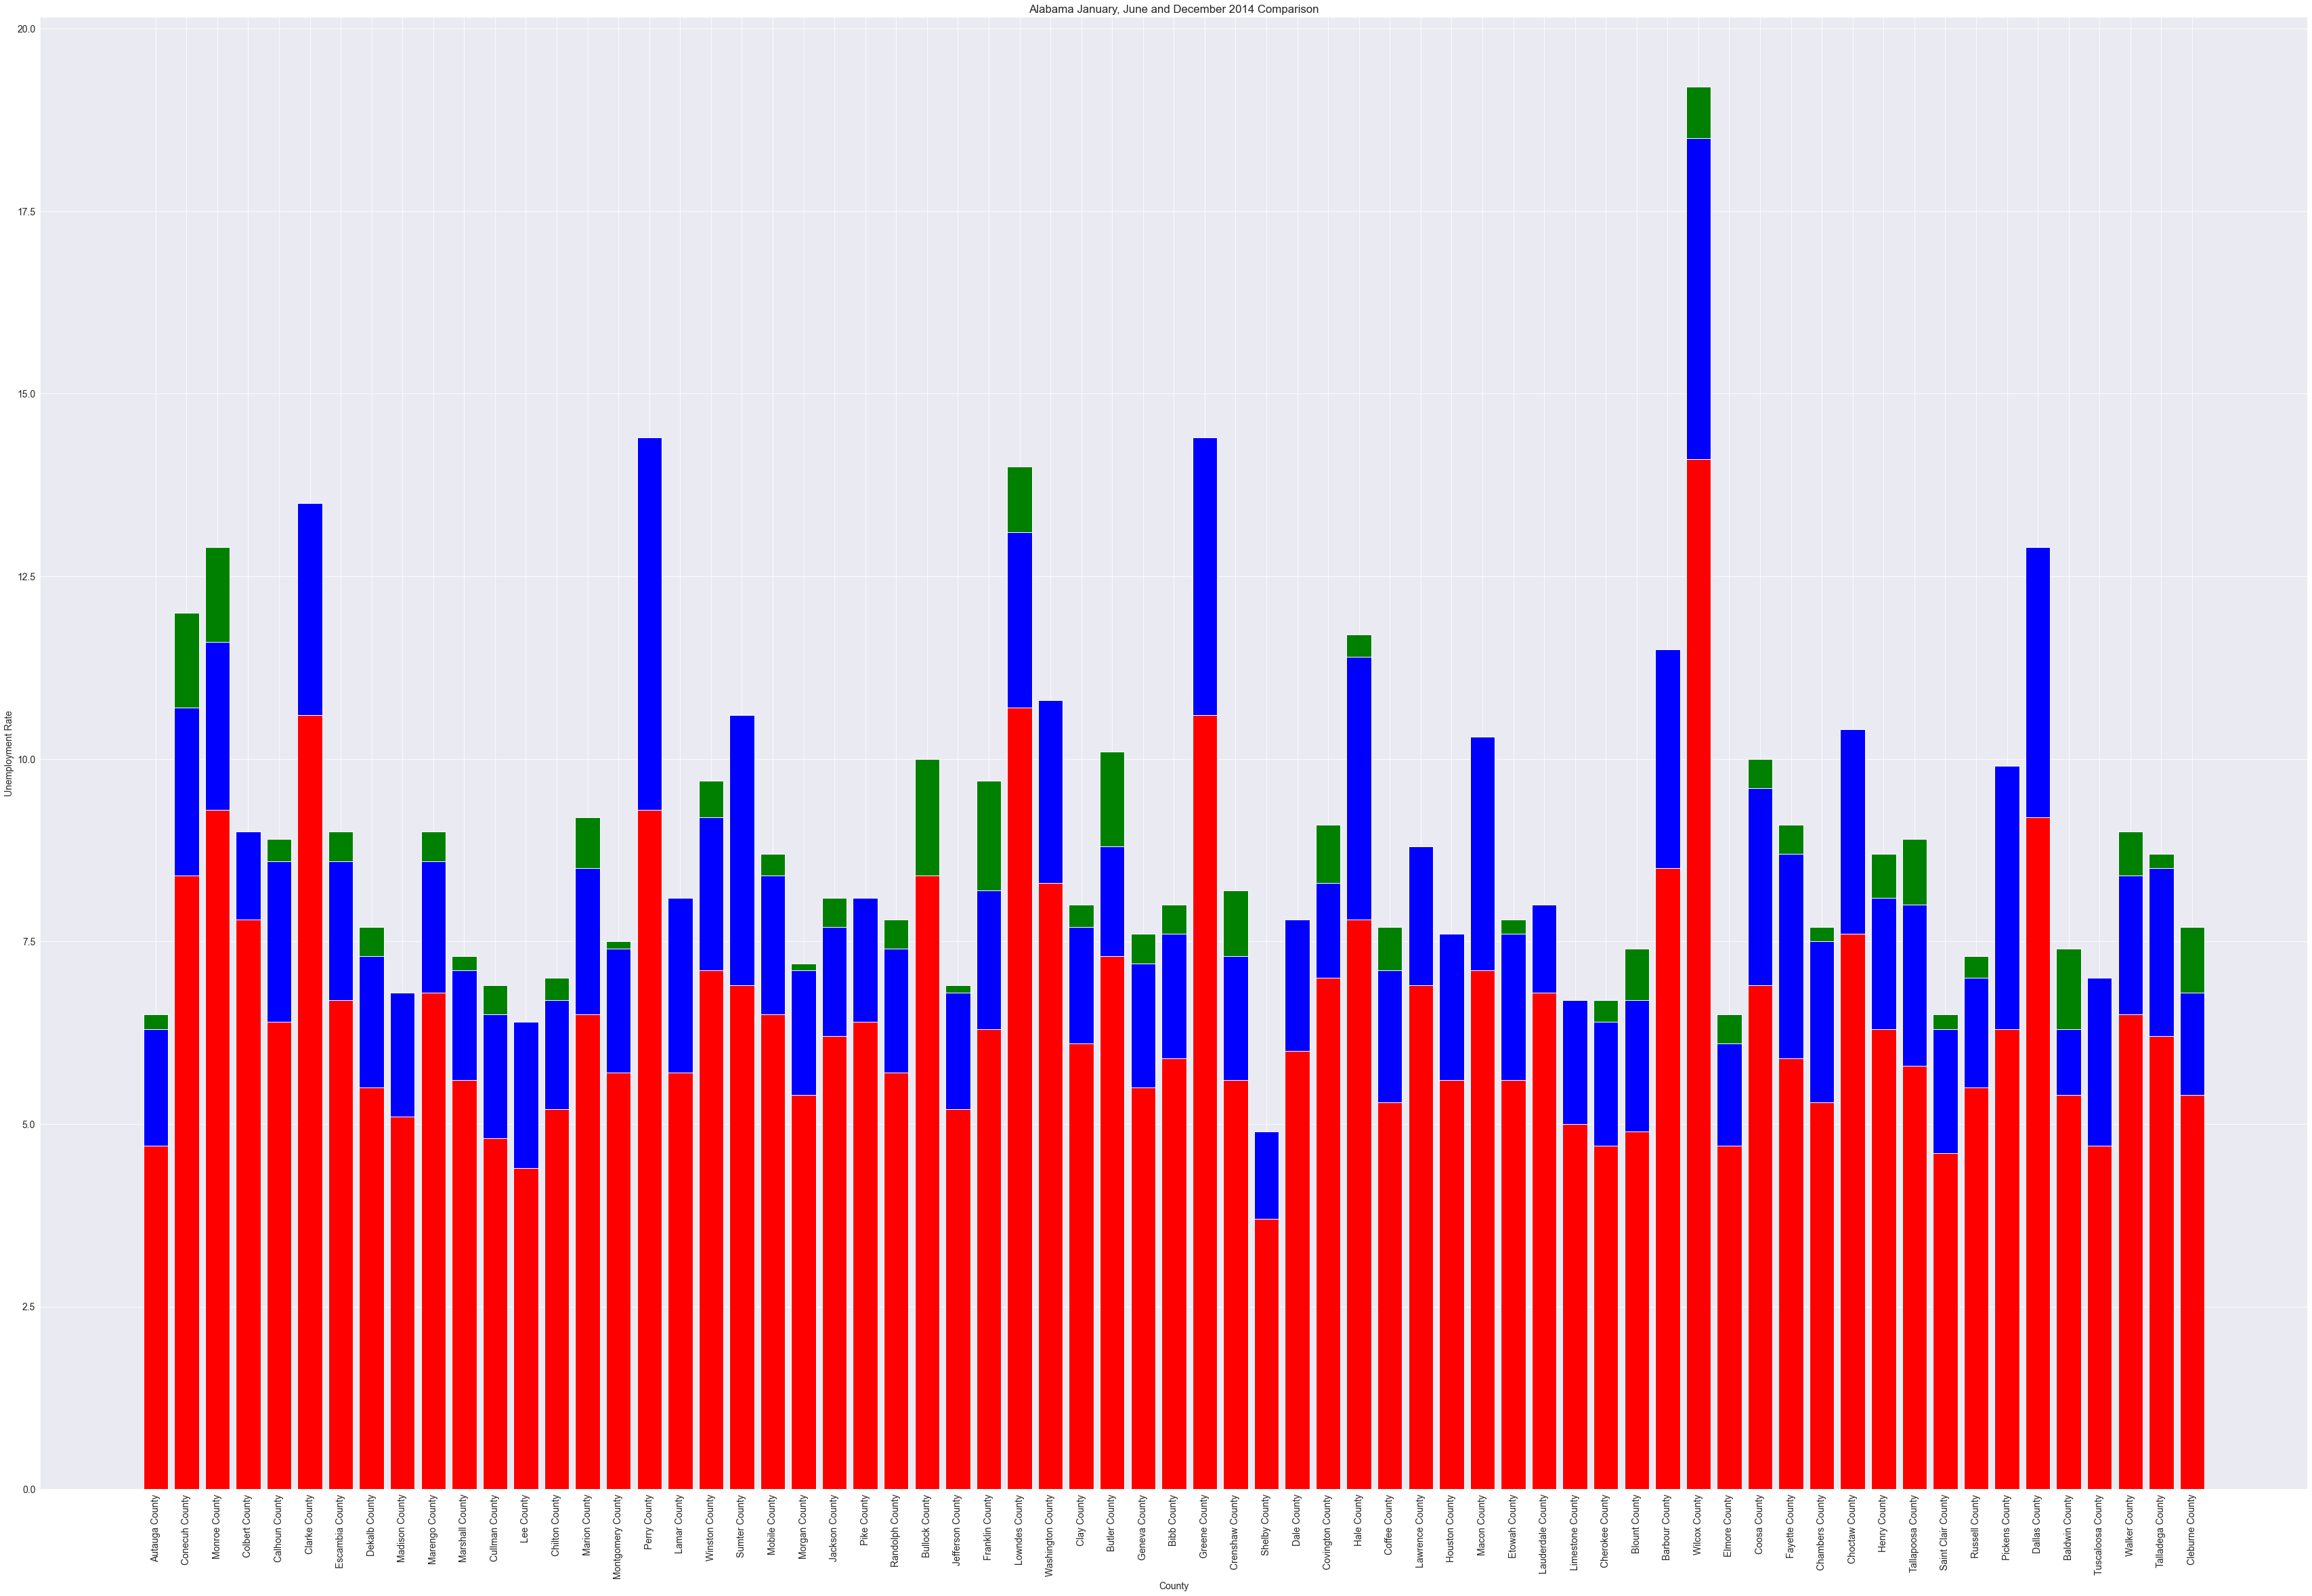

In [60]:
plt.figure(figsize=(60, 40))
plt.xticks(rotation=90)
plt.title('Alabama January, June and December 2014 Comparison')
plt.xlabel('County')
plt.ylabel('Unemployment Rate')
plt.rc('font', size=40)


plt.bar(Alabama_Jan.County, Alabama_Jan.Rate_2014, color='green');
plt.bar(Alabama_Jun.County, Alabama_Jun.Rate_2014, color='blue');
plt.bar(Alabama_Dec.County, Alabama_Dec.Rate_2014, color='red');

**The green bar represents January unemployment rate, blue is for June and red bar is December.
From the above visual analysis, it is clear that Wilcox County has maintained the highest unemployment rate in Alabama 2014, as high as 19% in January 2014, which is considerably very high.  
This begs the question, why is the unemployment rate so high? Could the County population be aging? Is it a retirement destination? Could it be due to lack of business opportunities or investments? Are residents migrating to other States or County for better opportunities?
Furthermore, it is clear that the unemployment rate of all the County's reduced drastically from January to December, which is a good indication of the population getting back into the work force or job creation. 
Finally, Shelby County has the lowest unemployment rate in Alabama consistently throughout 2014.**

In [61]:
Alabama_merge.sample(20)

,Month,State,County,Rate_2014,Rate_2015,Rate_2016
193,March,Alabama,Russell County,7.2,5.7,5.9
462,June,Alabama,Pickens County,9.9,7.7,7.7
546,April,Alabama,Marshall County,6.2,5.3,5.1
773,November,Alabama,Shelby County,3.8,4.0,4.1
430,June,Alabama,Lowndes County,13.1,12.7,11.7
48,February,Alabama,Blount County,7.4,5.6,6.0
177,March,Alabama,Macon County,10.5,7.7,7.8
642,December,Alabama,Hale County,7.8,7.8,8.0
251,August,Alabama,Wilcox County,17.6,15.8,13.9
668,December,Alabama,Talladega County,6.2,6.4,7.0


In [62]:

Washington_Jan = Washington_merge[Washington_merge.Month == 'January']
Washington_Jun = Washington_merge[Washington_merge.Month == 'June']
Washington_Dec = Washington_merge[Washington_merge.Month == 'December']

In [63]:
Washington_Jan

,Month,State,County,Rate_2014,Rate_2015,Rate_2016
195,January,Washington,Asotin County,6.3,5.5,6.0
196,January,Washington,Mason County,9.5,8.8,8.6
197,January,Washington,Klickitat County,10.2,9.0,8.9
198,January,Washington,Jefferson County,9.2,8.6,7.9
199,January,Washington,Chelan County,8.1,7.5,8.0
200,January,Washington,San Juan County,6.9,6.8,6.9
201,January,Washington,Cowlitz County,9.1,8.5,8.0
202,January,Washington,Whitman County,5.3,5.0,5.1
203,January,Washington,Snohomish County,5.7,4.9,5.6
204,January,Washington,Adams County,10.7,10.9,10.3


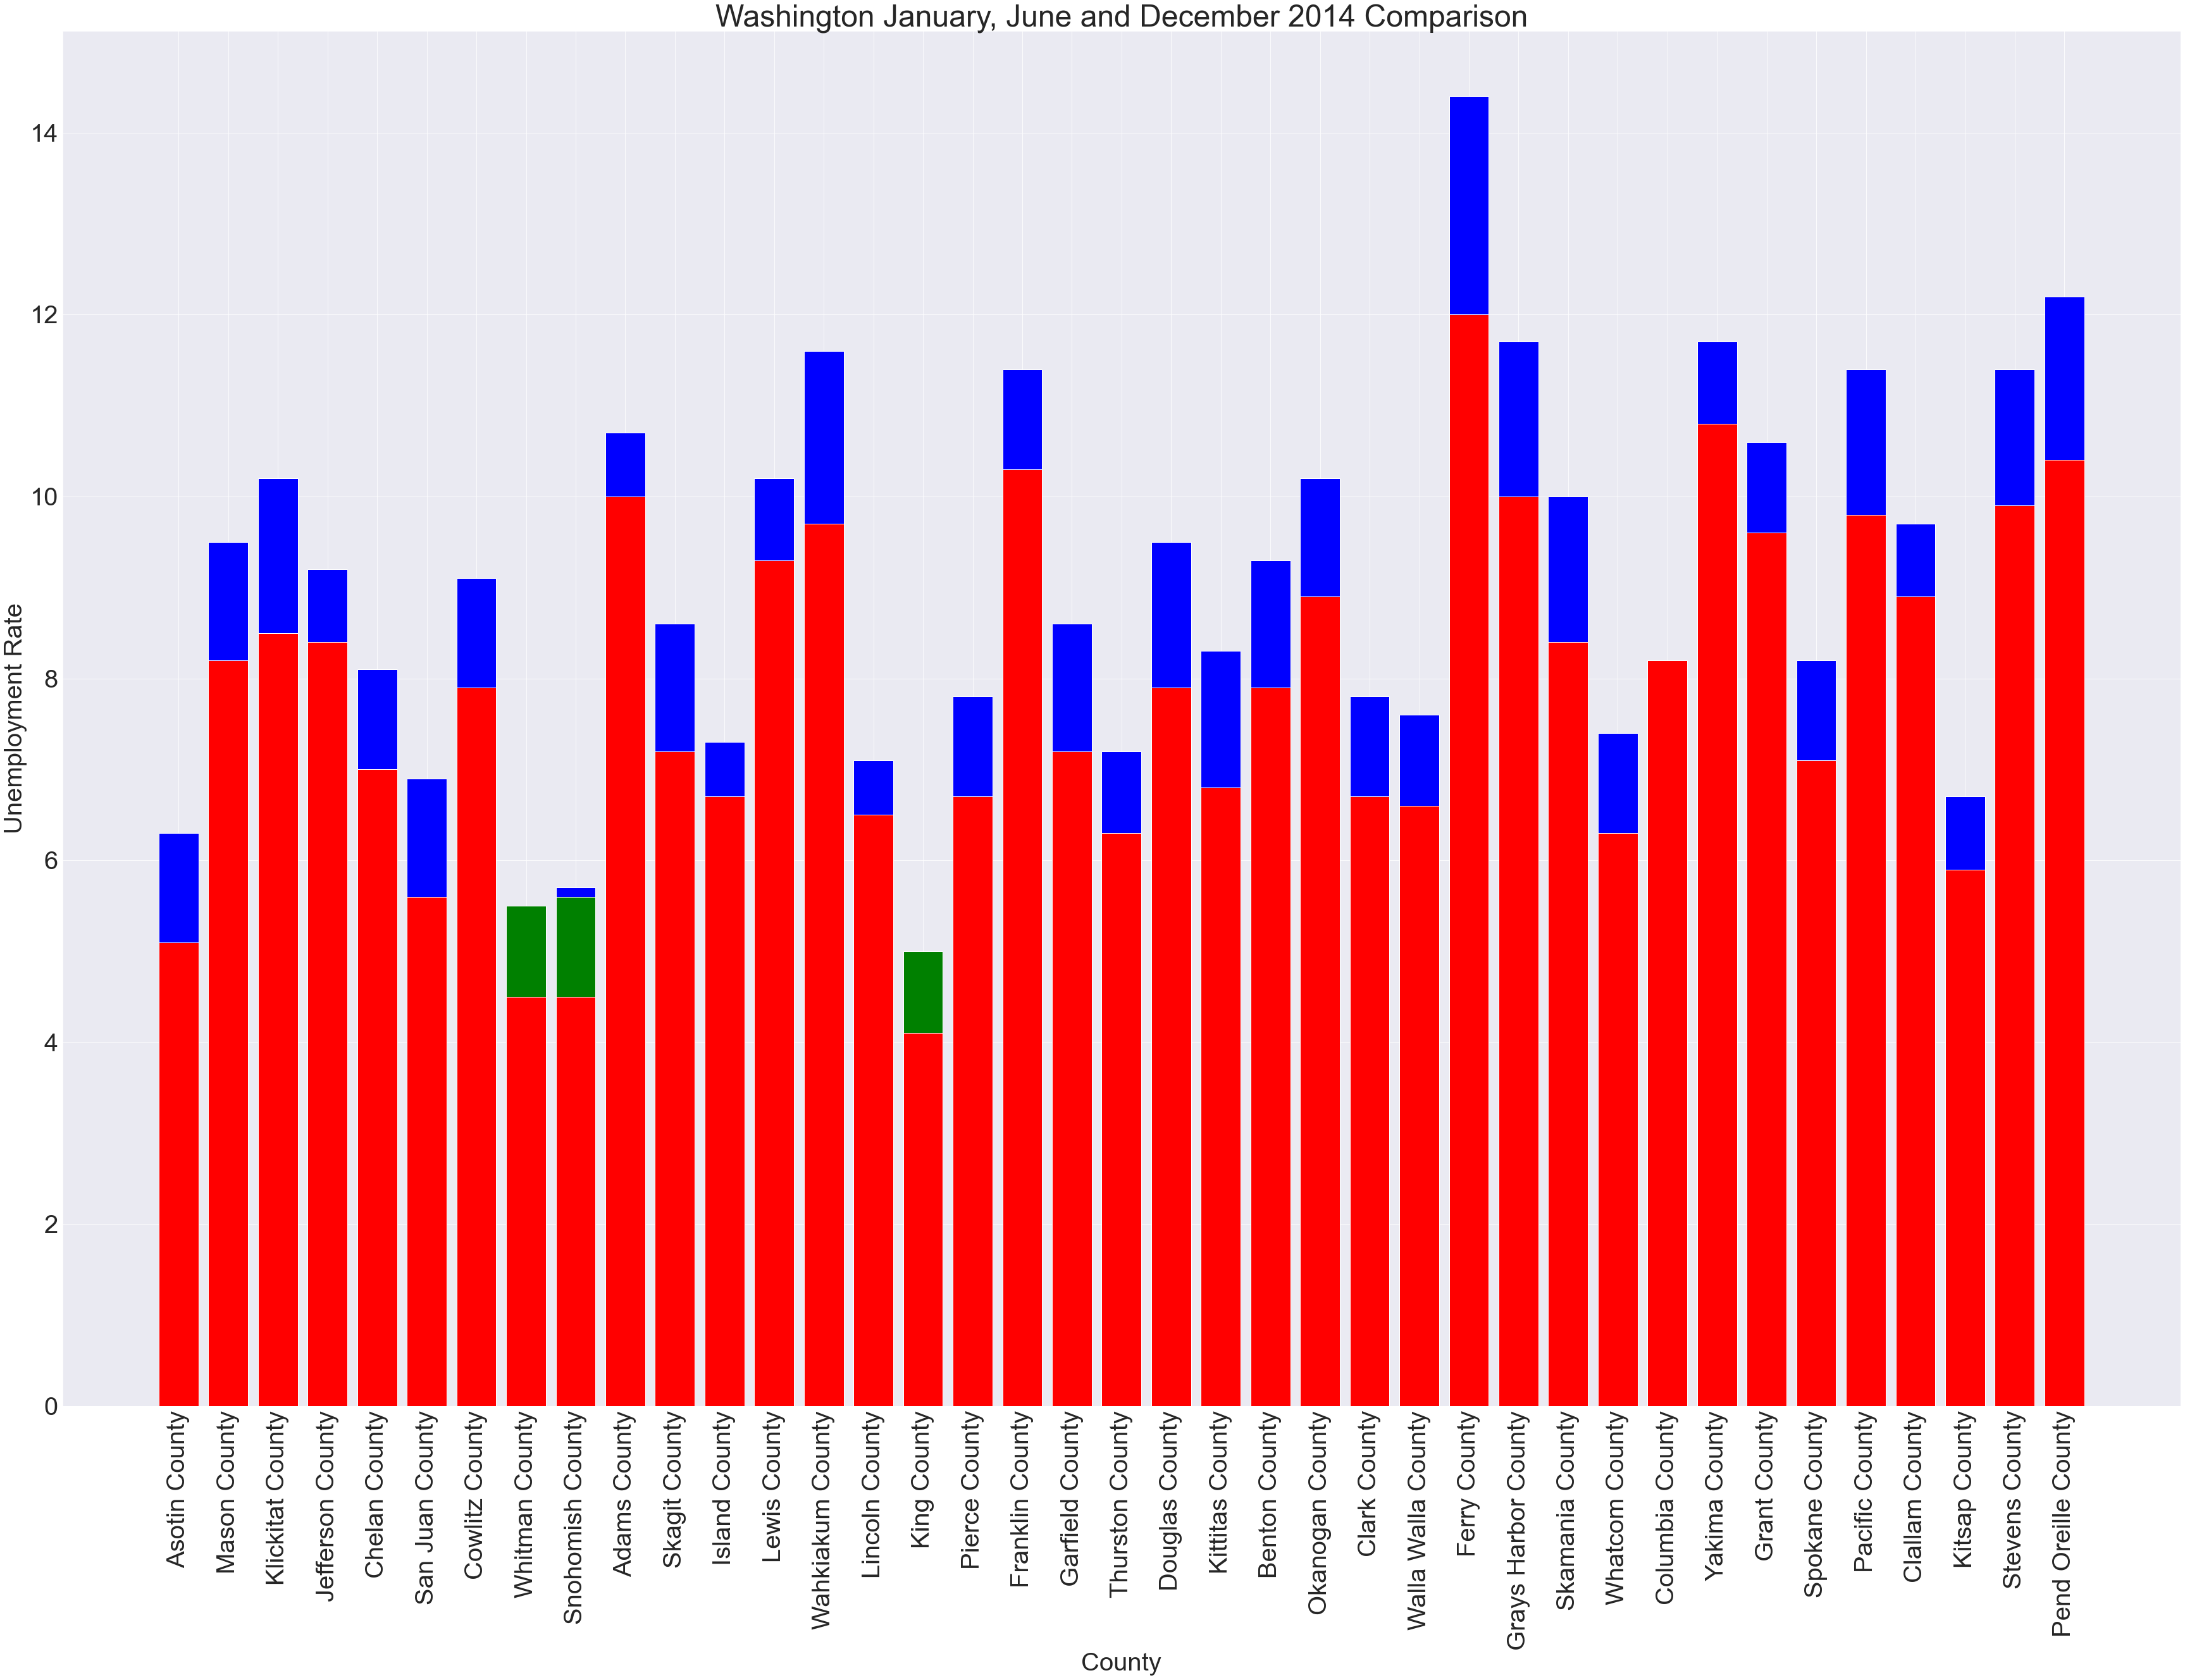

In [64]:
plt.figure(figsize=(60, 40))
plt.xticks(rotation=90)
plt.title('Washington January, June and December 2014 Comparison')
plt.xlabel('County')
plt.ylabel('Unemployment Rate')
plt.rc('font', size=40)

plt.bar(Washington_Jan.County, Washington_Jan.Rate_2014, color='blue');
plt.bar(Washington_Jun.County, Washington_Jun.Rate_2014, color='green');
plt.bar(Washington_Dec.County, Washington_Dec.Rate_2014, color='red');

**The blue bar represents January unemployment rate, green represents June and red bar is December.
Through this data visualization, it is clear that from January, June to December, Washington state also experienced a gradual reduction in unemployment rate. 
Also a lot of Counties had higher than 10% unemployment rate in 2014.
Ferry County has the highest unemployment rate in Alabama, whilst King Count has the lowest unemployment rate.
Only 3 states had a reduction between June and December, most states only showed difference between January and December suggesting the unemployment rate remained same till December, even though the reduction may have begun from other months that are not part of this analysis.**

### We will analyze one more state

In [65]:

NY_Jan = New_York_merge[New_York_merge.Month == 'January']
NY_Jun = New_York_merge[New_York_merge.Month == 'June']
NY_Dec = New_York_merge[New_York_merge.Month == 'December']

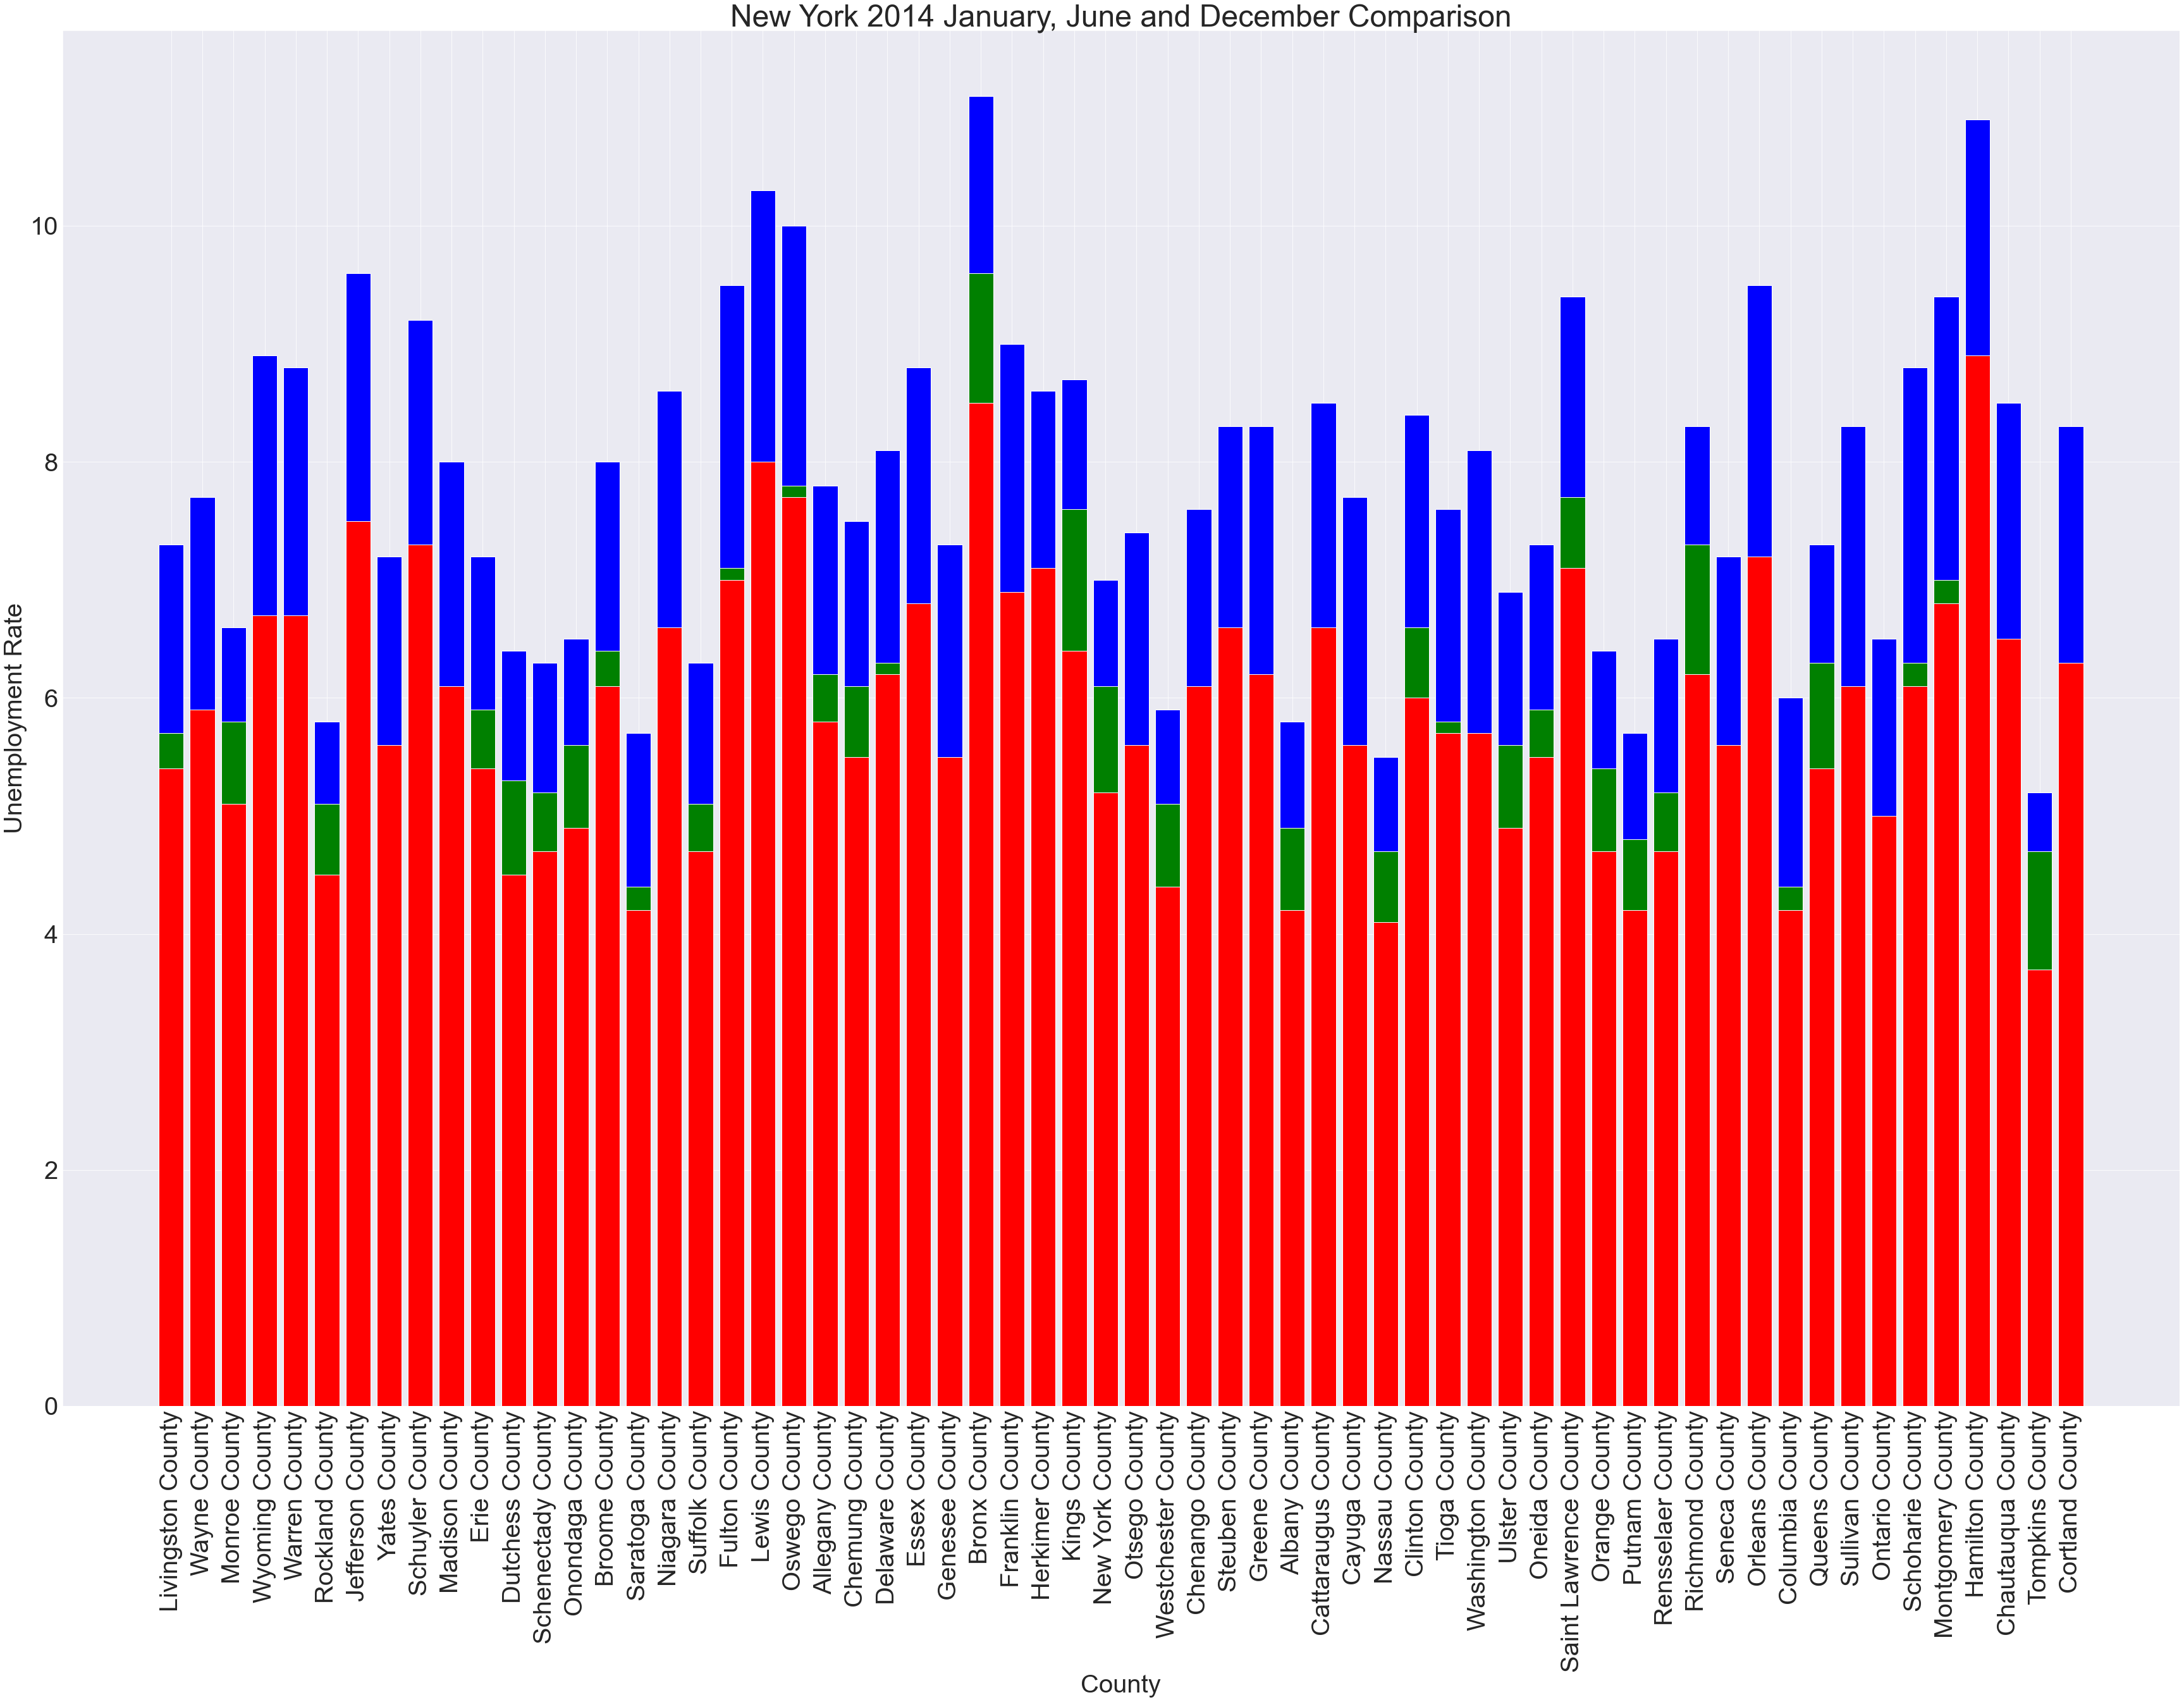

In [66]:

plt.figure(figsize=(60, 40))
plt.xticks(rotation=90)
plt.title('New York 2014 January, June and December Comparison')
plt.xlabel('County')
plt.ylabel('Unemployment Rate')
plt.rc('font', size=40)

plt.bar(NY_Jan.County, NY_Jan.Rate_2014, color='blue');
plt.bar(NY_Jun.County, NY_Jun.Rate_2014, color='green');
plt.bar(NY_Dec.County, NY_Dec.Rate_2014, color='red');

**The blue bar represents January unemployment rate, green represents June and red bar is December.
In 2014, the Bronx County had the highest unemployment rate with Hamilton County coming a very close second, whilst Tompkins County had the lowest County.
All the Counties experienced a drastic reduction between January and December. By December 2014, none of the Counties had an unemployment rate which is above 10%, all the double digit unemployment rate in January dropped to the single digits, which may be a good indication of investments and job creation in the State.**

## Asking and Answering Questions

>
> - Ask at least 5 questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


# What is the average Unemployment Rate of each State Between 2014 and 2016 across each Counties? 
We will use Numpy to compute the average unemployment rate.

In [67]:
Alabama_avg = np.mean(Alabama_merge)
Alabama_avg = Alabama_avg.reset_index()
Alabama_avg = Alabama_avg.rename(columns = {'index':'Year', 0:'Average'})
Alabama_avg

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Year,Average
0,Rate_2014,7.917164
1,Rate_2015,7.033085
2,Rate_2016,6.773756


In [68]:
Maryland_avg = np.mean(Maryland_merge)
Maryland_avg = Maryland_avg.reset_index()
Maryland_avg = Maryland_avg.rename(columns = {'index':'Year', 0:'Average'})
Maryland_avg

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Year,Average
0,Rate_2014,6.435069
1,Rate_2015,5.778819
2,Rate_2016,4.909028


In [69]:
MS_avg = np.mean(Massachusetts_merge)
MS_avg = MS_avg.reset_index()
MS_avg = MS_avg.rename(columns = {'index':'Year', 0:'Average'})
MS_avg

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Year,Average
0,Rate_2014,6.233333
1,Rate_2015,5.425595
2,Rate_2016,4.140476


In [70]:
NY_avg = np.mean(New_York_merge)
NY_avg = NY_avg.reset_index()
NY_avg = NY_avg.rename(columns = {'index':'Year', 0:'Average'})
NY_avg

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Year,Average
0,Rate_2014,6.311559
1,Rate_2015,5.582258
2,Rate_2016,5.004167


In [71]:
Washington_avg = np.mean(Washington_merge)
Washington_avg = Washington_avg.reset_index()
Washington_avg = Washington_avg.rename(columns = {'index':'Year', 0:'Average'})
Washington_avg

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Year,Average
0,Rate_2014,7.407692
1,Rate_2015,6.835684
2,Rate_2016,6.911752


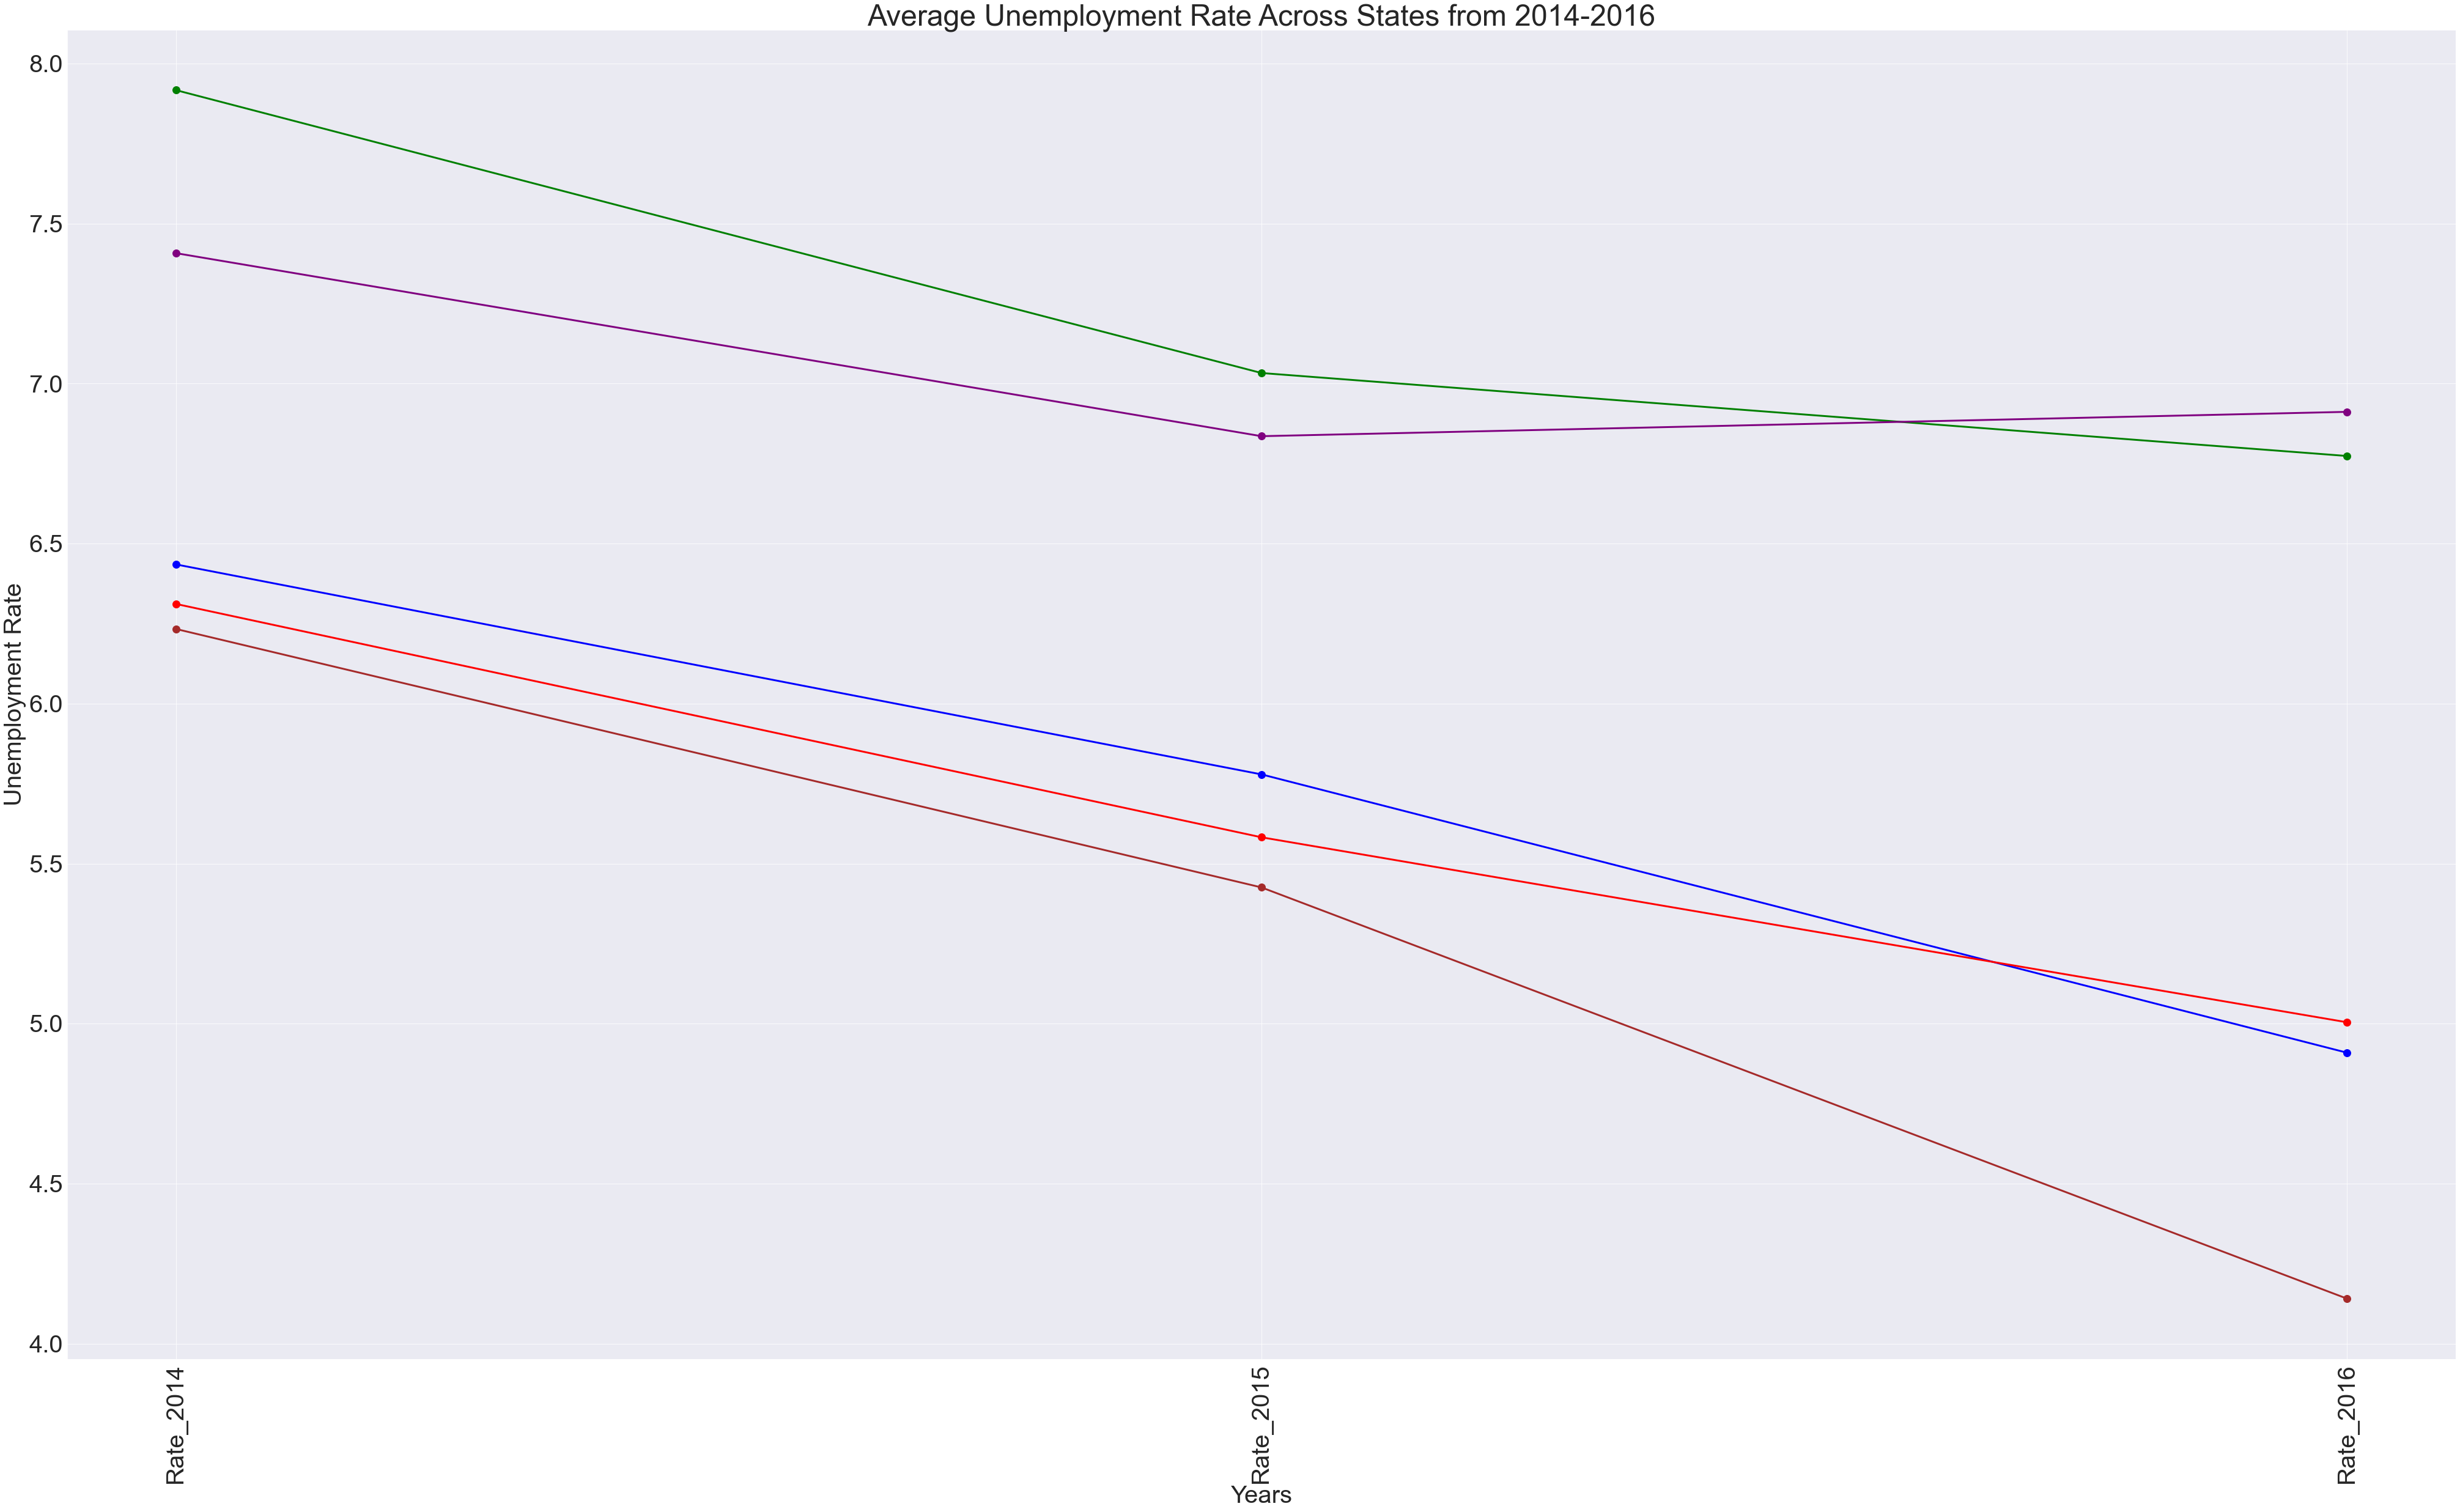

In [72]:
plt.figure(figsize=(70, 40))
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate Across States from 2014-2016')
plt.xlabel('Years')
plt.ylabel('Unemployment Rate')
plt.rc('font', size=40)

plt.plot(Alabama_avg.Year, Alabama_avg.Average, color='green', marker = 'o', lw = 3, ms = 12);
plt.plot(Maryland_avg.Year, Maryland_avg.Average, color='blue', marker = 'o', lw = 3, ms = 12);
plt.plot(MS_avg.Year, MS_avg.Average, color='brown', marker = 'o', lw = 3, ms = 12);
plt.plot(NY_avg.Year, NY_avg.Average, color='red', marker = 'o', lw = 3, ms = 12);
plt.plot(Washington_avg.Year, Washington_avg.Average, color='purple', marker = 'o', lw = 3, ms = 12);

**Green line is for Alabama, Blue is for Maryland, Red is for New York, Purple is for Washington and Brown is Massachusetts.
From this line graph it is clear that averagely all the states experienced a sharp decline in their unemployment rate between 2014 and 2015. Most of the states also experienced a decline in 2016 except Washington, whose unemployment rate was gradually rose higher than 2015 but not as high as 2014.
It is also clear from the graph that Massachusetts and Maryland experienced the most drastic decline between 2014 and 2016.**

# Which Counties averages above 10% for Three years in a row

In [73]:
MS_County_avg = Massachusetts_merge.groupby('County')[['Rate_2014', 'Rate_2015','Rate_2016']].mean()
MS_County_avg

,Rate_2014,Rate_2015,Rate_2016
County,,,
Barnstable County,7.166667,6.366667,4.841667
Berkshire County,6.525000,5.566667,4.341667
Bristol County,7.266667,6.291667,4.766667
Dukes County,8.333333,7.200000,5.391667
Essex County,5.950000,5.166667,3.891667
Franklin County,5.233333,4.525000,3.425000
Hampden County,7.833333,6.766667,5.175000
Hampshire County,5.050000,4.416667,3.416667
Middlesex County,4.658333,4.058333,3.075000


In [74]:
NY_County_avg = New_York_merge.groupby('County')[['Rate_2014', 'Rate_2015','Rate_2016']].mean()
NY_County_avg

,Rate_2014,Rate_2015,Rate_2016
County,,,
Albany County,4.891667,4.408333,4.033333
Allegany County,6.200000,5.775000,5.350000
Bronx County,9.716667,7.741667,7.341667
Broome County,6.633333,6.066667,5.366667
Cattaraugus County,6.950000,6.191667,5.666667
...,...,...,...
Washington County,6.108333,5.141667,4.575000
Wayne County,6.166667,5.425000,4.908333
Westchester County,5.133333,4.608333,4.166667


In [75]:
Washington_County_avg = Washington_merge.groupby('County')[['Rate_2014', 'Rate_2015','Rate_2016']].mean()
Washington_County_avg

,Rate_2014,Rate_2015,Rate_2016
County,,,
Adams County,7.275000,6.933333,6.783333
Asotin County,5.333333,4.700000,5.108333
Benton County,7.458333,6.583333,6.558333
Chelan County,6.150000,5.533333,5.966667
Clallam County,8.350000,7.991667,8.000000
Clark County,7.008333,6.341667,6.283333
Columbia County,7.091667,6.383333,6.766667
Cowlitz County,8.016667,7.583333,7.408333
Douglas County,7.108333,6.333333,7.275000


In [76]:
Alabama_County_avg = Alabama_merge.groupby('County')[['Rate_2014', 'Rate_2015','Rate_2016']].mean()
Alabama_County_avg

,Rate_2014,Rate_2015,Rate_2016
County,,,
Autauga County,5.875000,5.250000,5.208333
Baldwin County,6.150000,5.491667,5.350000
Barbour County,10.550000,8.941667,8.533333
Bibb County,7.216667,6.608333,6.508333
Blount County,6.158333,5.408333,5.433333
...,...,...,...
Tuscaloosa County,5.941667,5.433333,5.625000
Walker County,7.891667,7.216667,7.483333
Washington County,9.650000,8.850000,8.708333


In [77]:
Maryland_County_avg = Maryland_merge.groupby('County')[['Rate_2014', 'Rate_2015','Rate_2016']].mean()
Maryland_County_avg

,Rate_2014,Rate_2015,Rate_2016
County,,,
Allegany County,7.575000,7.041667,6.266667
Anne Arundel County,5.066667,4.508333,3.783333
Baltimore City,8.558333,7.708333,6.416667
Baltimore County,6.100000,5.450000,4.616667
Calvert County,5.308333,4.658333,3.875000
Caroline County,6.241667,5.591667,4.816667
Carroll County,4.791667,4.300000,3.608333
Cecil County,6.583333,6.016667,5.058333
Charles County,5.733333,5.075000,4.283333


In [78]:

MS_County_avg.loc[(MS_County_avg.Rate_2014 >= 10) & (MS_County_avg.Rate_2015 >= 10) & (MS_County_avg.Rate_2016 >= 10)]

,Rate_2014,Rate_2015,Rate_2016
County,,,


In [79]:
Washington_County_avg.loc[(Washington_County_avg.Rate_2014 >= 10) & (Washington_County_avg.Rate_2015 >= 10) & (Washington_County_avg.Rate_2016 >= 10)]

,Rate_2014,Rate_2015,Rate_2016
County,,,
Ferry County,11.325,10.2,10.716667


In [80]:
NY_County_avg.loc[(NY_County_avg.Rate_2014 >= 10) & (NY_County_avg.Rate_2015 >= 10) & (NY_County_avg.Rate_2016 >= 10)]

,Rate_2014,Rate_2015,Rate_2016
County,,,


In [81]:
Alabama_County_avg.loc[(Alabama_County_avg.Rate_2014 >= 10) & (Alabama_County_avg.Rate_2015 >= 10) & (Alabama_County_avg.Rate_2016 >= 10)]

,Rate_2014,Rate_2015,Rate_2016
County,,,
Clarke County,12.200000,11.750000,11.175000
Greene County,12.500000,11.016667,10.125000
Lowndes County,12.841667,11.583333,10.741667
Wilcox County,16.958333,14.633333,14.316667


In [82]:
Maryland_County_avg.loc[(Maryland_County_avg.Rate_2014 >= 10) & (Maryland_County_avg.Rate_2015 >= 10) & (Maryland_County_avg.Rate_2016 >= 10)]

,Rate_2014,Rate_2015,Rate_2016
County,,,


**From the query result, it is clear that only Alabama and Washington State that had County that averaged above 10% for three years in a row. Alabama had 4 Counties, whilst Washington had just one. Above 10% unemployment rate is quite high.**

# Which Counties averages below 5% for Three years in a row

In [83]:
Maryland_County_avg.loc[(Maryland_County_avg.Rate_2014 < 5) & (Maryland_County_avg.Rate_2015 < 5) & (Maryland_County_avg.Rate_2016 < 5)]

,Rate_2014,Rate_2015,Rate_2016
County,,,
Carroll County,4.791667,4.300000,3.608333
Howard County,4.316667,3.916667,3.266667
Montgomery County,4.383333,3.975000,3.366667


In [84]:
Alabama_County_avg.loc[(Alabama_County_avg.Rate_2014 < 5) & (Alabama_County_avg.Rate_2015 < 5) & (Alabama_County_avg.Rate_2016 < 5)]

,Rate_2014,Rate_2015,Rate_2016
County,,,
Shelby County,4.5,4.225,4.358333


In [85]:
MS_County_avg.loc[(MS_County_avg.Rate_2014 < 5) & (MS_County_avg.Rate_2015 < 5) & (MS_County_avg.Rate_2016 < 5)]

,Rate_2014,Rate_2015,Rate_2016
County,,,
Middlesex County,4.658333,4.058333,3.075000
Norfolk County,4.991667,4.350000,3.308333


In [86]:
Washington_County_avg.loc[(Washington_County_avg.Rate_2014 < 5) & (Washington_County_avg.Rate_2015 < 5) & (Washington_County_avg.Rate_2016 < 5)]

,Rate_2014,Rate_2015,Rate_2016
County,,,
King County,4.725,4.441667,4.216667


In [87]:
NY_County_avg.loc[(NY_County_avg.Rate_2014 < 5) & (NY_County_avg.Rate_2015 < 5) & (NY_County_avg.Rate_2016 < 5)]

,Rate_2014,Rate_2015,Rate_2016
County,,,
Albany County,4.891667,4.408333,4.033333
Columbia County,4.716667,4.058333,3.666667
Nassau County,4.775000,4.316667,3.850000
Putnam County,4.891667,4.341667,3.900000
Saratoga County,4.658333,4.225000,3.775000
Tompkins County,4.383333,4.075000,3.683333


**From the above, it is clear that all the States had at least one County that averaged below 5% from 2014 to 2016.**

# Which month has the highest average unemployment rate

In [88]:
Alabama_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()
Alabama_month = Alabama_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()

In [89]:
Maryland_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()
Maryland_month  = Maryland_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()

In [90]:
Massachusetts_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()
Massachusetts_month = Massachusetts_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()

In [91]:
New_York_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()
NY_month = New_York_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()

In [92]:
Washington_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()
Washington_month = Washington_merge.groupby('Month')[['Rate_2014','Rate_2015', 'Rate_2016']].mean()

In [93]:
Alabama_month.Rate_2014.sort_values(ascending = False).head(1)

Month
February    9.138806
Name: Rate_2014, dtype: float64

In [94]:
Alabama_month.Rate_2015.sort_values(ascending = False).head(1)

Month
July    7.762687
Name: Rate_2015, dtype: float64

In [95]:
Alabama_month.Rate_2016.sort_values(ascending = False).head(1)

Month
June    7.464179
Name: Rate_2016, dtype: float64

In [96]:
Maryland_month.Rate_2014.sort_values(ascending = False).head(1)

Month
January    7.483333
Name: Rate_2014, dtype: float64

In [97]:
Maryland_month.Rate_2015.sort_values(ascending = False).head(1)

Month
January    7.025
Name: Rate_2015, dtype: float64

In [98]:
Maryland_month.Rate_2016.sort_values(ascending = False).head(1)

Month
January    5.9
Name: Rate_2016, dtype: float64

In [99]:
Massachusetts_month.Rate_2014.sort_values(ascending = False).head(1)

Month
January    8.114286
Name: Rate_2014, dtype: float64

In [100]:
Massachusetts_month.Rate_2015.sort_values(ascending = False).head(1)

Month
January    7.157143
Name: Rate_2015, dtype: float64

In [101]:
Massachusetts_month.Rate_2016.sort_values(ascending = False).head(1)

Month
January    6.121429
Name: Rate_2016, dtype: float64

In [102]:
NY_month.Rate_2014.sort_values(ascending = False).head(1)

Month
February    7.83871
Name: Rate_2014, dtype: float64

In [103]:
NY_month.Rate_2015.sort_values(ascending = False).head(1)

Month
January    6.959677
Name: Rate_2015, dtype: float64

In [104]:
NY_month.Rate_2016.sort_values(ascending = False).head(1)

Month
January    5.941935
Name: Rate_2016, dtype: float64

In [105]:
Washington_month.Rate_2014.sort_values(ascending = False).head(1)

Month
February    9.282051
Name: Rate_2014, dtype: float64

In [106]:
Washington_month.Rate_2015.sort_values(ascending = False).head(1)

Month
January    8.502564
Name: Rate_2015, dtype: float64

In [107]:
Washington_month.Rate_2016.sort_values(ascending = False).head(1)

Month
January    8.3
Name: Rate_2016, dtype: float64

**From the above query result, the most recurring trend is that January appears to have the highest average unemployment across multiple states and years. Only Alabama does not have January as its highest average month but it does have February, which has the second highest average unemployment monthly rate.**

# Which month has the lowest average unemployment rate

In [108]:
Alabama_month.Rate_2014.sort_values(ascending = False).tail(1)

Month
December    6.535821
Name: Rate_2014, dtype: float64

In [109]:
Alabama_month.Rate_2015.sort_values(ascending = False).tail(1)

Month
April    6.368657
Name: Rate_2015, dtype: float64

In [110]:
Alabama_month.Rate_2016.sort_values(ascending = False).tail(1)

Month
April    6.19403
Name: Rate_2016, dtype: float64

In [111]:
Maryland_month.Rate_2014.sort_values(ascending = False).tail(1)

Month
September    5.816667
Name: Rate_2014, dtype: float64

In [112]:
Maryland_month.Rate_2015.sort_values(ascending = False).tail(1)

Month
September    5.170833
Name: Rate_2015, dtype: float64

In [113]:
Maryland_month.Rate_2016.sort_values(ascending = False).tail(1)

Month
September    4.2375
Name: Rate_2016, dtype: float64

In [114]:
Massachusetts_month.Rate_2014.sort_values(ascending = False).tail(1)

Month
October    5.128571
Name: Rate_2014, dtype: float64

In [115]:
Massachusetts_month.Rate_2015.sort_values(ascending = False).tail(1)

Month
October    4.542857
Name: Rate_2015, dtype: float64

In [116]:
Massachusetts_month.Rate_2016.sort_values(ascending = False).tail(1)

Month
October    2.742857
Name: Rate_2016, dtype: float64

In [117]:
NY_month.Rate_2014.sort_values(ascending = False).tail(1)

Month
October    5.362903
Name: Rate_2014, dtype: float64

In [118]:
NY_month.Rate_2015.sort_values(ascending = False).tail(1)

Month
October    4.727419
Name: Rate_2015, dtype: float64

In [119]:
NY_month.Rate_2016.sort_values(ascending = False).tail(1)

Month
May    4.445161
Name: Rate_2016, dtype: float64

In [120]:
Washington_month.Rate_2014.sort_values(ascending = False).tail(1)

Month
September    6.374359
Name: Rate_2014, dtype: float64

In [121]:
Washington_month.Rate_2015.sort_values(ascending = False).tail(1)

Month
September    5.835897
Name: Rate_2015, dtype: float64

In [122]:
Washington_month.Rate_2016.sort_values(ascending = False).tail(1)

Month
September    6.025641
Name: Rate_2016, dtype: float64

**From the above results, the most recurring lowest monthly average unemployment rate is September followed closely by October. Massachusetts had the lowest unemployment average with 2% in October 2016, which is very great.**

## Inferences and Conclusion

 **From the analysis, it is clear that all the States experienced their highest unemployment rate in 2014 and their lowest was in 2016, except Washington State which had a steady incline.
Alabama has the highest unemployment rate amongst the States over the course of the analyzed years. It had the highest number of Counties averaging above 10% for every year analyzed, with Wilcox County never averaging below 14%, which is considerably high when 3 of the States never even had a County that experienced unemployment rate above 10% in all the three years. 
Howard County, Maryland had the lowest average unemployment rate in 2016 with 3.26%.
The highest monthly average unemployment rate was in January for most States, whilst the lowest monthly average was in September.**

## References and Future Work

**I used Kaggle for this analysis:  'https://www.kaggle.com/jayrav13/unemployment-by-county-us' 
In the future, for this analysis, I will definitely be analysing across more States, more current years and also researching as to why the unemployment rate such as age, sex, marriage status, companies and job opportunities within the states etc.**